[ 0.01948696  0.05113776 -0.06164604 -0.23860703  0.04848365  0.36526948
  0.04848365 -0.23860703 -0.06164604  0.05113776  0.01948696]
[ 0.0e+00  5.0e-05  1.0e-04 ... -1.5e-04 -1.0e-04 -5.0e-05]
[-0.5     -0.49995 -0.4999  ...  0.49985  0.4999   0.49995]


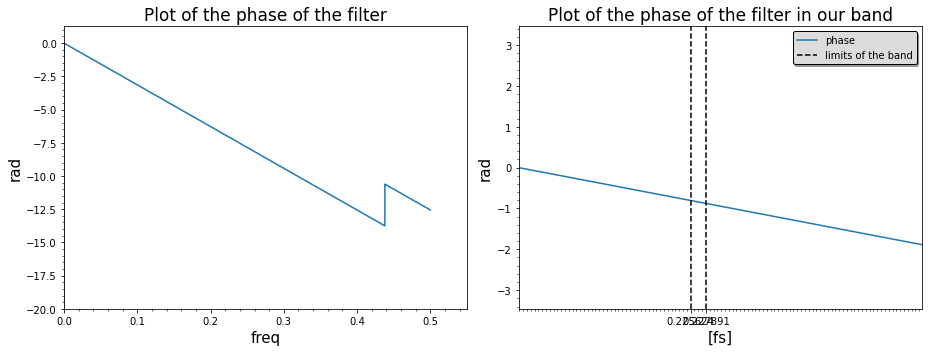

In [32]:

 

from scipy import fft     
from scipy import signal
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
#from playsound import playsound
import wavio as wv
import os
import math
import cmath




#FILTER DESIGN
numtaps = 11
f = [9950,10050]
fs = 44100
coeff = signal.firwin(numtaps, f, pass_zero ='bandpass',fs=fs)
print(coeff)

#FILTER FREQUENCY RESPONSE
fft_coeff = fftpack.fft(coeff,20000)
pow = np.abs(fft_coeff)      #amplitude response
phase = np.angle(fft_coeff)  #computing the phase
phase_unwrap = np.unwrap(p=phase) #Toglie le discontinuità
freqs_H = fftpack.fftfreq(20000)
print(freqs_H)
idx = np.argsort(freqs_H)
print(freqs_H[idx])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax[0].plot(freqs_H[idx], phase_unwrap[idx], label = 'phase')
ax[0].set_xlim(left=0)
ax[0].set_ylim(bottom=-20)
ax[0].set_xlabel('freq', fontsize=15)
ax[0].set_ylabel('rad', fontsize=15)
ax[0].set_title('Plot of the phase of the filter', fontsize=17)
ax[0].minorticks_on()
ax[1].plot(freqs_H[idx], phase[idx], label='phase')
ax[1].set_xlim(left=0.20, right=0.26)
ax[1].set_xlabel('[fs]', fontsize=15)
ax[1].set_ylabel('rad', fontsize=15)
ax[1].set_title('Plot of the phase of the filter in our band', fontsize=17)
ax[1].axvline(x=(f[0]/fs), linestyle='--', color ='black', label='limits of the band' ) # Limits of our band
ax[1].axvline(x=(f[1]/fs), linestyle='--', color ='black' )
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc='upper right')
ax[1].set_xticks(np.array(f)/fs, rotation=60)
ax[1].minorticks_on()

fig.tight_layout()

freq_sample_1, sig_audio_1 = wavfile.read("10kHz_44100Hz_16bit_05sec.wav")# portante_1
freq_sample_2, sig_audio_2 = wavfile.read("1kHz_44100Hz_16bit_05sec.wav")# portante_1
freq_sample_3, sig_audio_3 = wavfile.read("audiocheck.net_sin_5000Hz_-3dBFS_5s.wav")#16 bit
freq_sample_4, sig_audio_4 = wavfile.read("audiocheck.net_sin_100Hz_-3dBFS_5s.wav")#16 bit, modulante

#print(freq_sample_1)
#type(sig_audio_1)

#print(freq_sample_2)
#type(sig_audio_2)

(0.0, 1.0506914616421135)

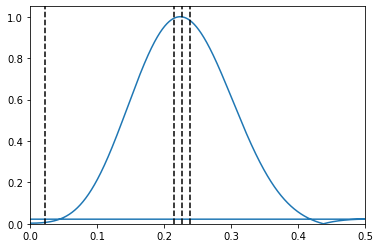

In [28]:
plt.plot(freqs_H, pow)
plt.axvline(x=(10000/fs), linestyle='--', color ='black' )
plt.axvline(x=(1000/fs), linestyle='--', color ='black' )
plt.axvline(x=(10500/fs), linestyle='--', color ='black' )
plt.axvline(x=(9500/fs), linestyle='--', color ='black' )
plt.xlim(left=0, right=0.5)
plt.ylim(bottom=0)

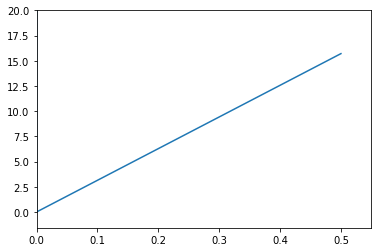

In [3]:
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)

exp=(1j*(numtaps-1)*0.5)*freqs*2*math.pi
correction = np.exp(exp)
phase_correction = np.angle(correction)
phase_correction = np.unwrap(phase_correction)
plt.plot(freqs[idx],phase_correction[idx])# Fase della correzione, opposta dell'altra, le fasi si annullano
plt.xlim(left=0)
plt.ylim(top=20)
plt.show()# lineare, non distorciamo il segnale trasmesso

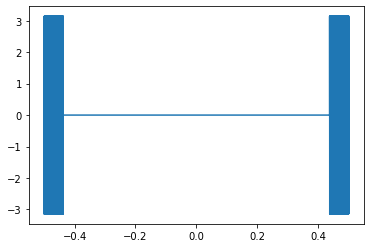

In [4]:
fft_coeff = fftpack.fft(coeff,N)
fft_coeff_corr = fft_coeff*correction # Correggiamo la fase
phase_corr = np.angle(fft_coeff_corr)
plt.plot(freqs[idx],phase_corr[idx])
plt.show()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


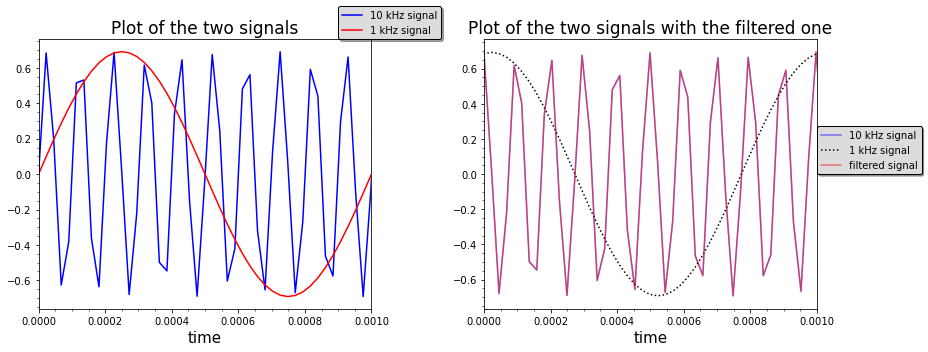

In [8]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal_1 = sig_audio_1 / np.power(2, 15)      #normalizzazione
pow_audio_signal_2 = sig_audio_2 / np.power(2, 15)
pow_audio_signal_3 = sig_audio_3 / np.power(2, 15)
pow_audio_signal_3 = pow_audio_signal_3[:-1]
pow_audio_signal_4 = sig_audio_4 / np.power(2, 15)
pow_audio_signal_4 = pow_audio_signal_4[:-1]


time_axis = np.arange(0, len(pow_audio_signal_1), 1) / float(freq_sample_1)
#time_axis = np.linspace(0, len(pow_audio_signal_1), )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
ax[0].plot(time_axis, pow_audio_signal_1, color='blue', label='10 kHz signal')
ax[0].plot(time_axis, pow_audio_signal_2, color='red', label='1 kHz signal')
ax[0].set_xlim(right=1/1000,left=0)
ax[0].set_xlabel('time', fontsize=15)
ax[0].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[0.9,1])
ax[0].set_title('Plot of the two signals', fontsize=17)
ax[0].minorticks_on()



somma = pow_audio_signal_1+pow_audio_signal_2

#CONVOLUTION BETWEEN FILTER AND THE SIGNAL
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)


#fft_coeff = fftpack.fft(coeff,N)    #Shift della fase
fft_somma = fftpack.fft(somma,N) 
out_corr = fft_somma*fft_coeff_corr
out = fft_somma*fft_coeff
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out,N)
time_output_corr = fftpack.ifft(out_corr,N)
#print(time_output)
time_output=time_output[numtaps-1:]
time_output_corr=time_output_corr[numtaps-1:]
ax[1].plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,color='blue', label='10 kHz signal', alpha=0.5)# Non prendiamo i primi 10, quindi shiftiamo l'11 al primo posto
ax[1].plot(time_axis-(10/freq_sample_1),pow_audio_signal_2,':',color='black', label='1 kHz signal')
ax[1].plot(time_axis,time_output_corr,color='red', label='filtered signal', alpha=0.5)
ax[1].set_xlim(left=0, right=1/1000)
ax[1].set_xlabel('time', fontsize=15)
ax[1].legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[1,0.5])
ax[1].set_title('Plot of the two signals with the filtered one', fontsize=17)
ax[1].minorticks_on()

#0.5*(freq_sample_1)/(10*10000*1000)

fig.tight_layout()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


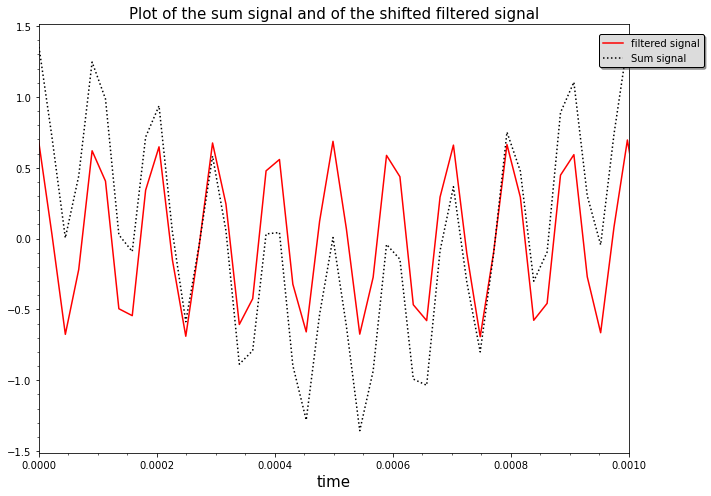

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.plot(time_axis, time_output_corr,color='red', label='filtered signal')
ax.plot(time_axis-(10/freq_sample_1),somma,':',color='black', label='Sum signal')
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[0.95,0.9])
ax.set_xlim(right=1/1000,left=0)
ax.set_title('Plot of the sum signal and of the shifted filtered signal', fontsize=15)
ax.minorticks_on()
ax.set_xlabel('time', fontsize=15)

fig.tight_layout()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


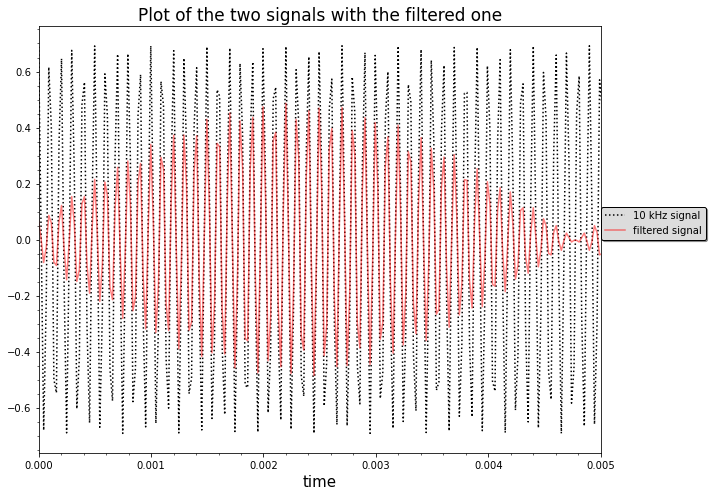

In [17]:
multiplication_1 = pow_audio_signal_4*pow_audio_signal_1 # modulante*portante_1

#CONVOLUTION BETWEEN FILTER AND THE SIGNAL
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)


#fft_coeff = fftpack.fft(coeff,N)    #Shift della fase
fft_multiplication_1 = fftpack.fft(multiplication_1,N) 
out_corr = fft_multiplication_1*fft_coeff_corr
out = fft_multiplication_1*fft_coeff
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out,N)
time_output_corr = fftpack.ifft(out_corr,N)
#print(time_output)
time_output=time_output[numtaps-1:]
time_output_corr=time_output_corr[numtaps-1:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
#ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,color='blue', label='10 kHz signal', alpha=0.5)# Non prendiamo i primi 10, quindi shiftiamo l'11 al primo posto
ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,':',color='black', label='10 kHz signal') #portnate_1
ax.plot(time_axis,time_output_corr,color='red', label='filtered signal', alpha=0.5)
ax.set_xlim(left=0, right=5/1000)
ax.set_xlabel('time', fontsize=15)
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[1,0.5])
ax.set_title('Plot of the two signals with the filtered one', fontsize=17)
ax.minorticks_on()

#0.5*(freq_sample_1)/(10*10000*1000)
# rossa = filtrato, blu=modulante=segnale utile, nera = portante
fig.tight_layout()

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


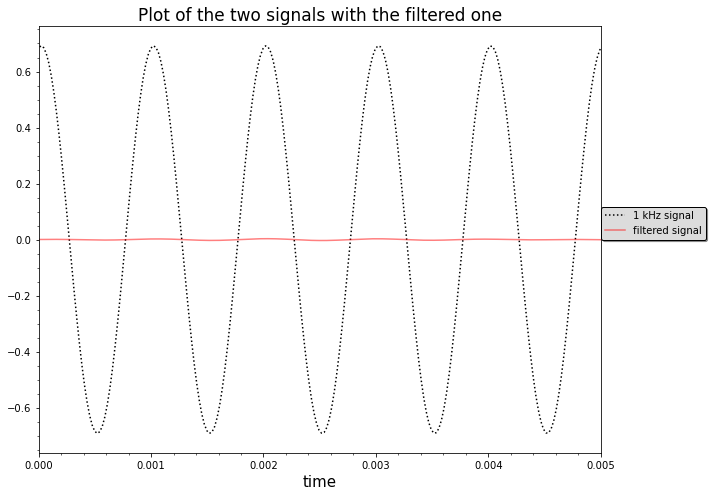

In [18]:
multiplication_2 = pow_audio_signal_4*pow_audio_signal_2 # modulante * portante_2

#CONVOLUTION BETWEEN FILTER AND THE SIGNAL
N=len(coeff)+len(sig_audio_1)-1 #lunghezza della convoluzione (lunghezza segnale + lunghezza coefficienti - 1)


#fft_coeff = fftpack.fft(coeff,N)    #Shift della fase
fft_multiplication_2 = fftpack.fft(multiplication_2,N) 
out_corr = fft_multiplication_2*fft_coeff_corr
out = fft_multiplication_2*fft_coeff
freqs = fftpack.fftfreq(N)
idx=np.argsort(freqs)
#TIME DOMAIN FILTERED SIGNAL
time_output = fftpack.ifft(out,N)
time_output_corr = fftpack.ifft(out_corr,N)
#print(time_output)
time_output=time_output[numtaps-1:]
time_output_corr=time_output_corr[numtaps-1:]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
#ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_1,color='blue', label='10 kHz signal', alpha=0.5)# Non prendiamo i primi 10, quindi shiftiamo l'11 al primo posto
ax.plot(time_axis-(10/freq_sample_1),pow_audio_signal_2,':',color='black', label='1 kHz signal')
ax.plot(time_axis,time_output_corr,color='red', label='filtered signal', alpha=0.5)
ax.set_xlim(left=0, right=5/1000)
ax.set_xlabel('time', fontsize=15)
ax.legend(shadow=True, framealpha=1, facecolor='gainsboro', edgecolor='black', prop={'size':10}, loc=[1,0.5])
ax.set_title('Plot of the two signals with the filtered one', fontsize=17)
ax.minorticks_on()

#0.5*(freq_sample_1)/(10*10000*1000)
# rossa = filtrato, blu=modulante=segnale utile, nera = portante
fig.tight_layout()